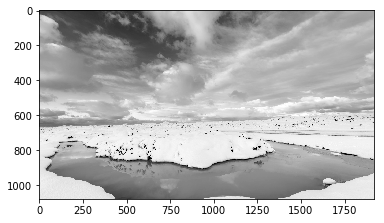

In [56]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img_path = 'imgs/3.jpg'

bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        k_height, k_width = weight.size()[2:]
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        self.pool = nn.MaxPool2d(4,4)
    def forward(self, x):
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pool_x =  self.pool(activated_x)
        return conv_x, activated_x,pool_x

In [58]:
import numpy as np
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)
print(model)

Net (
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d (size=(4, 4), stride=(4, 4), dilation=(1, 1))
)


In [59]:
def viz_layer(layer,n_filters=4):
    fig = plt.figure(figsize=(20,20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1,n_filters,i+1)
        ax.imshow(np.squeeze(layer[0,i].data.numpy()),cmap='gray')
        ax.set_title('Output %s' % str(i+1))

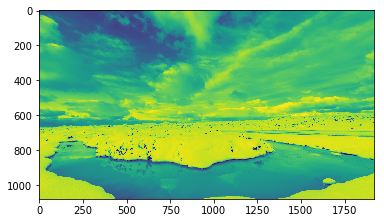

In [60]:
plt.imshow(gray_img)

In [61]:
gray_img_tensor = Variable(torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1))

print(torch.from_numpy(gray_img))
print(torch.from_numpy(gray_img).unsqueeze(0))
print(torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1))


 0.2824  0.2824  0.2824  ...   0.6353  0.6353  0.6353
 0.2902  0.2902  0.2863  ...   0.6353  0.6353  0.6353
 0.2902  0.2902  0.2863  ...   0.6353  0.6353  0.6353
          ...             ⋱             ...          
 0.8824  0.8941  0.9098  ...   0.9098  0.9098  0.9176
 0.8941  0.9059  0.9098  ...   0.9216  0.9176  0.9176
 0.9137  0.9059  0.8902  ...   0.9255  0.9216  0.9216
[torch.FloatTensor of size 1080x1920]


( 0  ,.,.) = 
  0.2824  0.2824  0.2824  ...   0.6353  0.6353  0.6353
  0.2902  0.2902  0.2863  ...   0.6353  0.6353  0.6353
  0.2902  0.2902  0.2863  ...   0.6353  0.6353  0.6353
           ...             ⋱             ...          
  0.8824  0.8941  0.9098  ...   0.9098  0.9098  0.9176
  0.8941  0.9059  0.9098  ...   0.9216  0.9176  0.9176
  0.9137  0.9059  0.8902  ...   0.9255  0.9216  0.9216
[torch.FloatTensor of size 1x1080x1920]


( 0  , 0  ,.,.) = 
  0.2824  0.2824  0.2824  ...   0.6353  0.6353  0.6353
  0.2902  0.2902  0.2863  ...   0.6353  0.6353  0.6353
  0.2902  0

In [62]:
print(gray_img_tensor)

Variable containing:
( 0  , 0  ,.,.) = 
  0.2824  0.2824  0.2824  ...   0.6353  0.6353  0.6353
  0.2902  0.2902  0.2863  ...   0.6353  0.6353  0.6353
  0.2902  0.2902  0.2863  ...   0.6353  0.6353  0.6353
           ...             ⋱             ...          
  0.8824  0.8941  0.9098  ...   0.9098  0.9098  0.9176
  0.8941  0.9059  0.9098  ...   0.9216  0.9176  0.9176
  0.9137  0.9059  0.8902  ...   0.9255  0.9216  0.9216
[torch.FloatTensor of size 1x1x1080x1920]



In [63]:
conv_layer,activate_layer,pool_layer = model(gray_img_tensor)

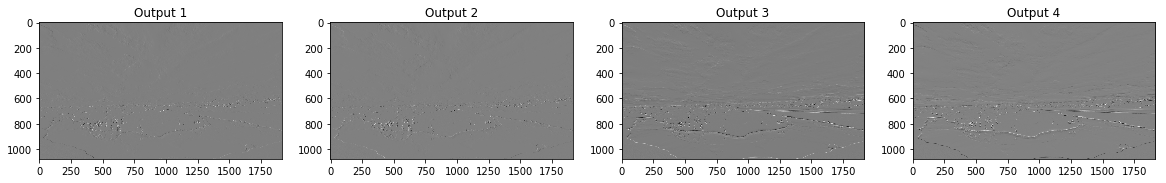

In [64]:
viz_layer(conv_layer)

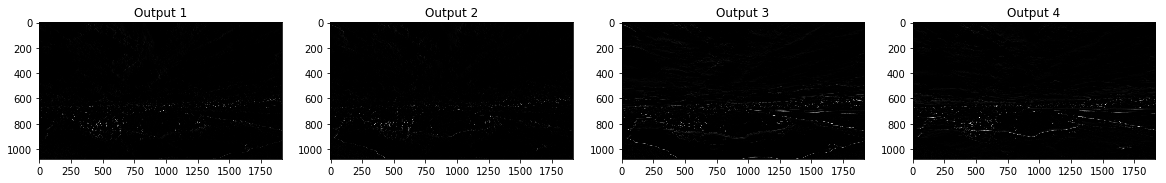

In [65]:
viz_layer(activate_layer)

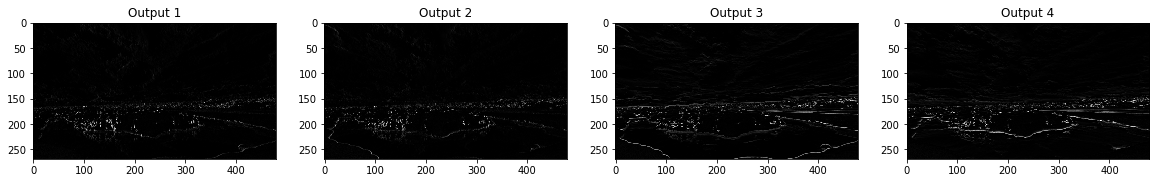

In [66]:
viz_layer(pool_layer)